In [84]:
# import stuff

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats
import os


# change this with the folder where you have saved the file
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\micrometereology\\02')

In [117]:
# FUNCTIONS

def plot_format_question1():
 
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('1/L [1/m]')
    plt.ylabel('PDF')
    plt.legend(loc='upper right')
    plt.title('Distribution of 1/L')

    plt.xlim(-10,10)

    plt.show()


def plot_format_logzvsU():
 
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Average of Easterly Wind Profiles')

    plt.yscale("log")
    plt.xlim(0,10)
    plt.ylim(0.05,120)

    plt.show()

def plot_format_logzvsU_zoom():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='center left')
    plt.title('Average of Easterly Wind Profiles')

    plt.yscale("log")
    plt.xlim(6,7)
    plt.ylim(70,110)

    plt.show()

def plot_format_logzvslogU():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('log Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Average of Easterly Wind Profiles')

    plt.yscale("log")
    plt.xscale("log")

    plt.show()

def plot_format_instabilities_ustar():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Normalized wind speed U/u*')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Wind profiles for different stabilities')

    plt.yscale("log")
    #plt.ylim(0.1,120)
    #plt.xlim(0,30)

    plt.show()


def plot_format_instabilities():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Wind profiles for different stabilities')

    plt.yscale("log")
    #plt.ylim(0.1,120)
    #plt.xlim(0,30)

    plt.show()



def plot_format_phi():
 
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('phi')
    plt.ylabel('z [m]')
    plt.legend(loc='lower right')
    plt.title('Monin-Obukhov similarity function')
    
    plt.xlim(0.5,3)

    plt.show()

def plot_format_quetion7():
    plt.rc('font', size=14)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=14)
    plt.xlabel('Wind speed U [m/s]')
    plt.ylabel('log z [m]')
    plt.legend(loc='lower right')
    plt.title('Easterly Wind Profiles and power law')

    plt.yscale("log")
    #plt.ylim(0.1,120)
    #plt.xlim(0,30)

    plt.show()


def get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) < 0.0008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)
    return U, U_std, ustar_mean

def get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  0.0008 < Lreciprocal[i] < 0.05:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)
    return U, U_std, ustar_mean

def get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  -0.05 < Lreciprocal[i] < -0.0008:
                V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
                u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)
    return U, U_std, ustar_mean   

def get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    u_star = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])
            u_star.append([ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    ustar_mean = np.mean(u_star, axis=0)
    return U, U_std, ustar_mean   


def get_Unorm_n(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if abs(Lreciprocal[i]) < 0.0008:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  0.0008 < Lreciprocal[i] < 0.05:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            if  -0.05 < Lreciprocal[i] < -0.0008:
                V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std

def get_Unorm_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar):
    V_all = []
    for i in range(0,len(data)):
        if 60 < direction[i] < 120:
            V_all.append([V10[i]/ustar[i], V40[i]/ustar[i], V60[i]/ustar[i], V80[i]/ustar[i], V100[i]/ustar[i]])
    
    U = np.mean(V_all, axis=0)
    U_std = np.std(V_all, axis=0)
    return U, U_std


def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/100000
    #width_bar = (max(array_data) - min(array_data)) / num + delta
    width_bar = (max(array_data) - min(array_data)) / num
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label)
    #area = np.sum(y[0]*(width_bar-delta))
    area = np.sum(y[0]*(width_bar))
    print(f"area under graph = {area:.5f}")


def plot_Gaussian(array_data, mu, sig, num, color, label):
    # computes the gaussian distribution given mu and sig and plots it in the range of the data to avoid zeros
    #x = np.linspace(min(array_data), max(array_data), num=num)
    x = np.linspace(-10, 10, num=num)
    y = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mu)/sig)**2)
    plt.plot(x, y, color=color, label=label)


def linear_regression(x,y):
    x_ave = np.sum(x)/len(x)
    y_ave = np.sum(y)/len(y)
    squaresumx = np.sum((x-x_ave)**2)
    squaresumy = np.sum((y-y_ave)**2)
    crossterm = np.sum((x-x_ave)*(y-y_ave))
    slope = crossterm/squaresumx
    intercept = y_ave - slope*x_ave
    return slope, intercept

def plot_linear_regression_logy(slope, intercept, x, y, color, label):
    x_interpol = np.insert(x, 0, 0)
    x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
    y_interpol = x_interpol * slope + intercept
    plt.plot(x_interpol, np.exp(y_interpol), color=color, label=label)


def plot_linear_regression_logxlogy(slope, intercept, x, y, color, label):
    x_interpol = np.insert(x, 0, 0)
    x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
    y_interpol = x_interpol * slope + intercept
    plt.plot(np.exp(x_interpol), np.exp(y_interpol), color=color, label=label)


        

In [21]:
# DATA

data = pd.read_csv('Hoevsoere2008.csv', delimiter=',', header=0, 
                    names=['time','ustar','Q0','direction','theta0', 'V10', 'V40','V60','V80','V100'])

ustar = data['ustar'].values
Q0 = data['Q0'].values
direction = data['direction'].values
theta0 = data['theta0'].values
V10 = data['V10'].values
V40 = data['V40'].values
V60 = data['V60'].values
V80 = data['V80'].values
V100 = data['V100'].values

k = 0.4
g = 9.8
Lreciprocal =  -k*g*Q0/(theta0*ustar**3)
z = [10,40,60,80,100]



all data: mean=-0.075, std=32.598
area under graph = 1.00000


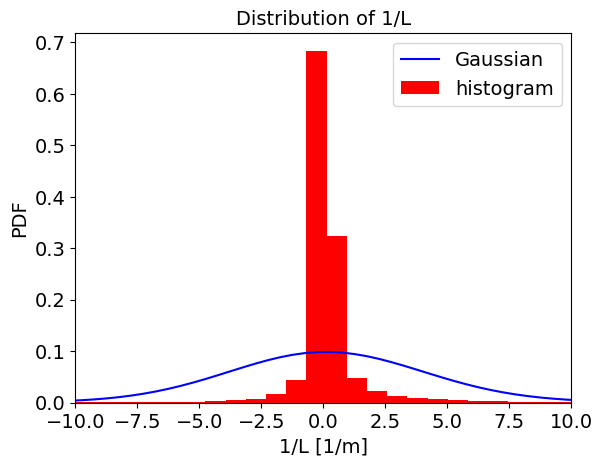

In [121]:
# QUESTION 1

def question1(Lreciprocal):
    Lreciprocal_mean = np.mean(Lreciprocal)    #= mu
    Lreciprocal_std = np.std(Lreciprocal)      #= sigma
    print(f"all data: mean={Lreciprocal_mean:.3f}, std={Lreciprocal_std:.3f}")
    plot_histogram(Lreciprocal, 10000,'r', 'histogram')
    
    bin_edges = np.arange(-22.5, 22.5, 0.5)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    kde = stats.gaussian_kde(Lreciprocal)
    pdf_values = kde(bin_centers)
    plt.plot(bin_centers, pdf_values, label='Gaussian', color='blue')

    #plot_Gaussian(array_data=Lreciprocal, mu=Lreciprocal_mean, sig=Lreciprocal_std, num=10000, color='b', label='Gaussian')


def question1_clean(Lreciprocal):
    Lclean = Lreciprocal[(Lreciprocal > -500) & (Lreciprocal < 500)]
    Lclean_mean = np.mean(Lclean)    #= mu
    Lclean_std = np.std(Lclean)      #= sigma
    print(f"cleaned data: mean={Lclean_mean:.3f}, std={Lclean_std:.3f}")
    plot_histogram(Lclean, 10000,'r', 'cleaned')
    plot_Gaussian(array_data=Lclean, mu=Lclean_mean, sig=Lclean_std, num=10000, color='b', label='Gaussian')
    plt.xlim(-4,4)

question1(Lreciprocal)
plot_format_question1()

#question1_clean(Lreciprocal)
#plot_format_question1()





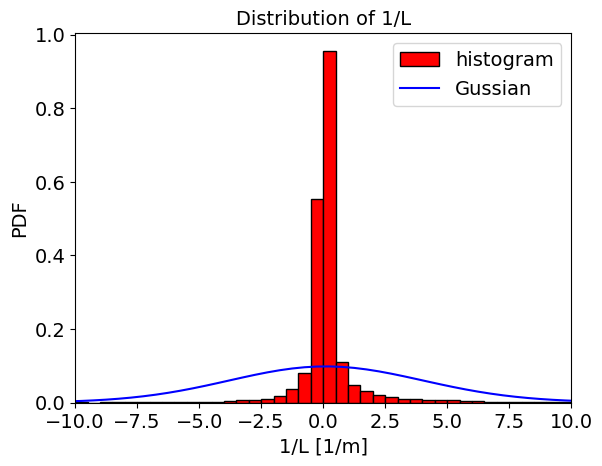

In [118]:


bin_edges = np.arange(-22.5, 22.5, 0.5)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

kde = stats.gaussian_kde(Lreciprocal)
pdf_values = kde(bin_centers)

plt.hist(Lreciprocal, bin_edges, edgecolor='k', color='r', density=True, label='histogram')
plt.plot(bin_centers, pdf_values, label='Gussian', color='blue')

plot_format_question1()



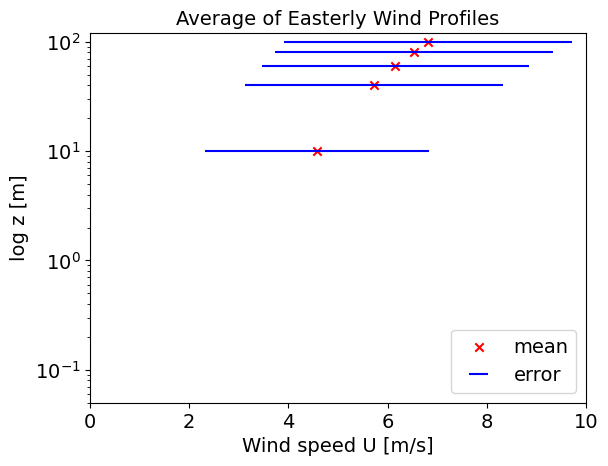

In [28]:
# QUESTION 2

#####     a     ################################################################


def question2a(z):
    U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
    x_error = U_std
    plt.errorbar(U, z, xerr = x_error, fmt ='none', color='b', label='error')
    plt.scatter(U, z, marker='x', color='r', label='mean')

question2a(z)
plot_format_logzvsU()


Equation of the line: y = 1.08244 x -2.60170


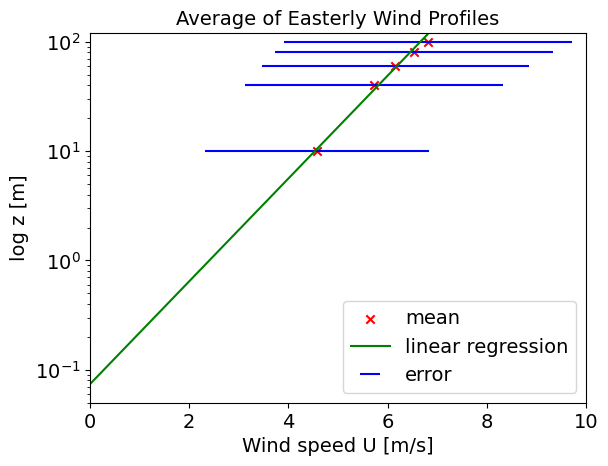

In [29]:
#####     b     ################################################################


def question2b():
    
    U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
    question2a(z)

    x = U[:-1]
    y = z[:-1]
    slope, intercept = linear_regression(x,np.log(y))
    print(f"Equation of the line: y = {slope:.5f} x {intercept:.5f}")
    plot_linear_regression_logy(slope, intercept, x, y, color='g', label='linear regression')
    
    
question2b()
plot_format_logzvsU()

In [31]:
#####     c     ################################################################

U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
slope, intercept = linear_regression(U[:-1], np.log(z[:-1]))

z0c = np.exp(intercept)
ustarc = k*slope
print(f"mean values of ustar = {ustarc:.5f} and zo = {z0c:.5f}")

mean values of ustar = 0.43297 and zo = 0.07415


Equation of the line: y = 1.08244 x -2.60170
U100_60 =  6.62333534443871
U100_80 =  6.739294800621721


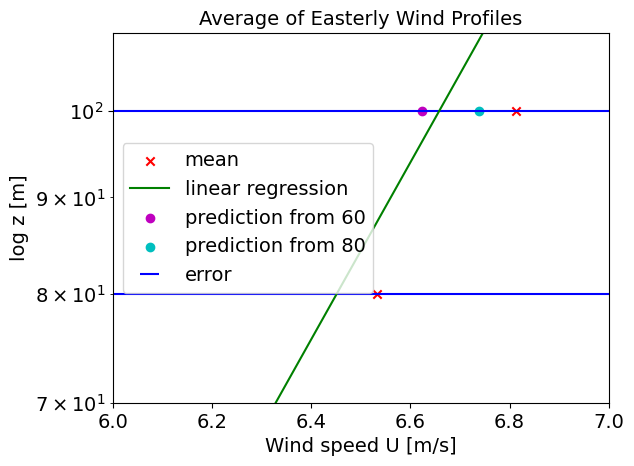

In [32]:
#####     d     ################################################################

def question2d():
    
    U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
    
    question2b()
    
    U60_mean = U[2]
    U80_mean = U[3]
    U100_mean = U[4]
    z60 = z[2]
    z80 = z[3]
    z100 = z[4]

    U100_60 = (np.log(z100)-np.log(z60))/slope + U60_mean
    U100_80 = (np.log(z100)-np.log(z80))/slope + U80_mean
    
    print('U100_60 = ', U100_60)
    print('U100_80 = ', U100_80)

    plt.scatter(U100_60, z100, color='m', label='prediction from 60')
    plt.scatter(U100_80, z100, color='c', label='prediction from 80')

    return U100_60, U100_80
    

U100_log60, U100_log80 = question2d()
plot_format_logzvsU_zoom()


Equation of the line: y = 5.91082 x -6.66533
estimated alpha = 0.17


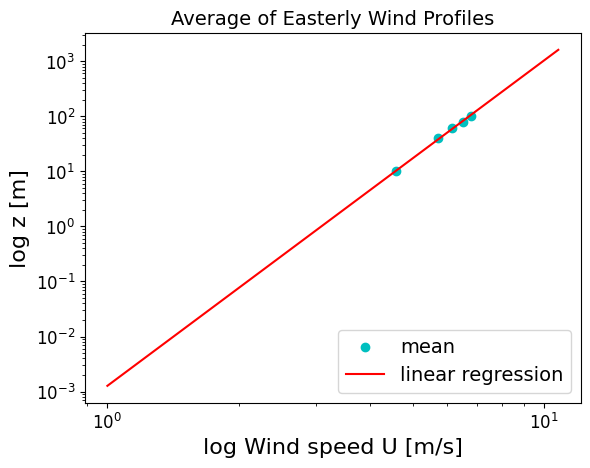

In [38]:
#####     e     ################################################################

def question2e():
    U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

    U_1080 = U[:-1]
    z_1080 = z[:-1]

    plt.scatter(U, z, marker='o', color='c', label = 'mean')
    slope, intercept = linear_regression(np.log(U_1080), np.log(z_1080))
    print(f"Equation of the line: y = {slope:.5f} x {intercept:.5f}")
    plot_linear_regression_logxlogy(slope, intercept, np.log(U_1080), np.log(z_1080), color='r', label='linear regression')

    alpha = 1/slope
    print(f"estimated alpha = {alpha:.2f}")


question2e()
plot_format_logzvslogU()

In [39]:
#####     f     ################################################################

U, U_std, ustar_mean = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

slope, intercept = linear_regression(np.log(U[:-1]), np.log(z[:-1]))
alpha_mean = 1/slope

alpha_array = [alpha_mean]

U60 = U[2]
U80 = U[3]
U100 = U[4]
z60 = z[2]
z80 = z[3]
z100 = z[4]

alpha_60 = np.log(U100/U60) / np.log(z100/z60)
alpha_80 = np.log(U100/U80) / np.log(z100/z80)
alpha_array.extend([alpha_60, alpha_80])

print('list of alpha:')
print(f"alpha mean    = {alpha_mean:.3f}  \nalpha from 60 = {alpha_60:.3f} \nalpha from 80 = {alpha_80:.3f}")



list of alpha:
alpha mean    = 0.169  
alpha from 60 = 0.200 
alpha from 80 = 0.188


In [40]:
#####     g     ################################################################

U100_array = []
for alpha in alpha_array:
    value = U80*(z100/z80)**alpha
    U100_array.append([value])
print(U100_array)


[[6.784497701703412], [6.831073895798986], [6.8125472]]


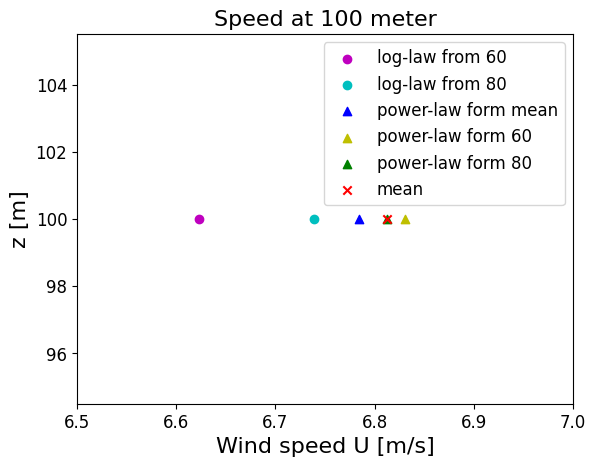

In [42]:
#####     h     ################################################################

z100 = z[4]

plt.scatter(U100_log60, z100, marker='o', color= 'm', label='log-law from 60')
plt.scatter(U100_log80, z100, marker='o', color = 'c', label='log-law from 80')

plt.scatter(U100_array[0], z100, marker='^', color = 'b', label='power-law form mean')
plt.scatter(U100_array[1], z100, marker='^', color = 'y', label='power-law form 60')
plt.scatter(U100_array[2], z100, marker='^', color = 'g', label='power-law form 80')

plt.scatter(U[4], z100, marker='x', color = 'r', label='mean')

plt.rc('font', size=12)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=16)
plt.xlabel('Wind speed U [m/s]')
plt.ylabel('z [m]')
plt.legend(loc='lower right')
plt.title('Speed at 100 meter')

plt.xlim(6.5,7)
plt.legend()
plt.show()



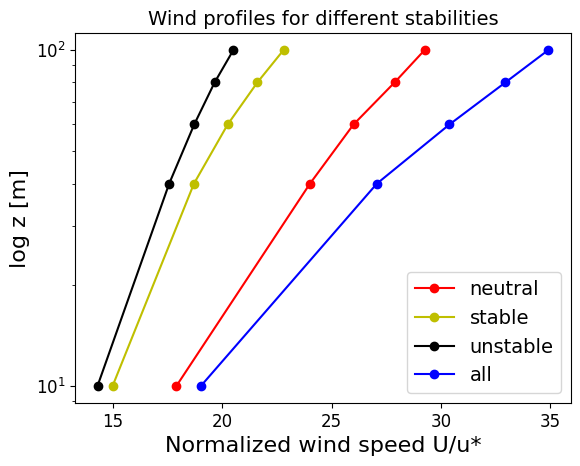

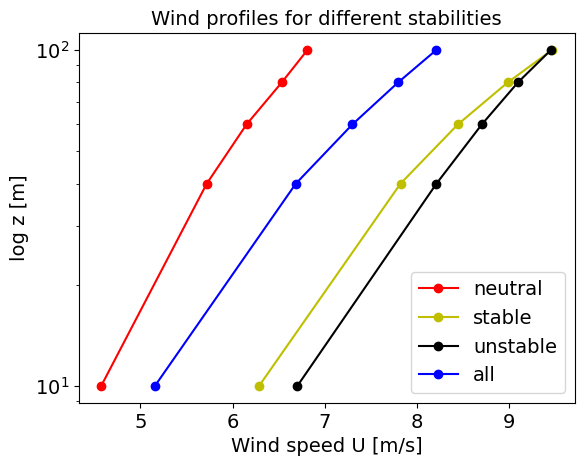

In [43]:
# QUESTION 3


Unorm_n, Unormn_std = get_Unorm_n(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_s, Unorms_std = get_Unorm_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_u, Unromu_std = get_Unorm_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Unorm_all, Unromall_std = get_Unorm_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

Un, Un_std, ustar_meann = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Us, Us_std, ustar_means = get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uu, Uu_std, ustar_meanu = get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uall, Uall_std, ustar_meanu = get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)


plt.plot(Unorm_n, z, color='r', marker='o', label='neutral')
plt.plot(Unorm_s, z, color='y', marker='o',label='stable')
plt.plot(Unorm_u, z, color='k', marker='o',label='unstable')
plt.plot(Unorm_all, z, color='b',marker='o', label='all')

plot_format_instabilities_ustar()


plt.plot(Un, z, color='r', marker='o', label='neutral')
plt.plot(Us, z, color='y', marker='o',label='stable')
plt.plot(Uu, z, color='k', marker='o',label='unstable')
plt.plot(Uall, z, color='b',marker='o', label='all')

plot_format_instabilities()





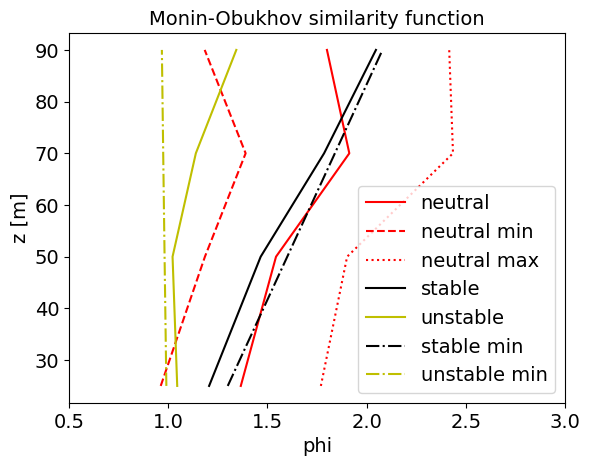

In [78]:
# QUESTION 4

Un, Un_std, ustar_meann = get_U(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Us, Us_std, ustar_means = get_U_s(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
Uu, Uu_std, ustar_meanu = get_U_u(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)

Un_min = Un - Un_std
Un_max = Un + Un_std


def compute_phi1(U,z,ustar,k):
    phi_list = []
    dUdz = []

    dUdz1 = 1/((z[1]-z[0])/(U[1]-U[0]))
    dUdz2 = 1/((z[2]-z[0])/(U[2]-U[0]))
    dUdz3 = 1/((z[3]-z[1])/(U[3]-U[1]))
    dUdz4 = 1/((z[4]-z[2])/(U[4]-U[2]))
    dUdz5 = 1/((z[4]-z[3])/(U[4]-U[3]))
    dUdz.append(dUdz1)
    dUdz.append(dUdz2)
    dUdz.append(dUdz3)
    dUdz.append(dUdz4)
    dUdz.append(dUdz5)
    
    for i in range(len(U)):
        phi = dUdz[i] * k * z[i] / ustar
        phi_list.append(phi)
    return phi_list

def compute_phi2(U,z,ustar,k):
    phi_list = []
    z_list = []

    for i in range(1,len(U)):
        z_intermediate = (z[i]+ z[i-1])/2
        dUdz = (U[i] - U[i-1])/(z[i]-z[i-1])
        phi = dUdz * k * z_intermediate / ustar

        z_list.append(z_intermediate)
        phi_list.append(phi)
    
    return phi_list, z_list


phin, z_intermediate = compute_phi2(Un,z,ustar_meann,k)
phin_min, z_intermediate = compute_phi2(Un_min,z,ustar_meann,k)
phin_max, z_intermediate = compute_phi2(Un_max,z,ustar_meann,k)
phis, z_intermediate = compute_phi2(Us,z,ustar_means,k)
phiu, z_intermediate = compute_phi2(Uu,z,ustar_meanu,k)


plt.plot(phin, z_intermediate, color='r', linestyle='solid', label='neutral')
plt.plot(phin_min, z_intermediate, color='r', linestyle='dashed', label='neutral min')
plt.plot(phin_max, z_intermediate, color='r', linestyle='dotted', label='neutral max')
plt.plot(phis, z_intermediate, color='k', linestyle='solid', label='stable')
plt.plot(phiu, z_intermediate, color='y', linestyle='solid', label='unstable')


def phi_formula_s(z,Lreciprocal):
    phi_array = []
    for i in range(len(z)):
        phi = 1 + 4.8*Lreciprocal*z[i]
        phi_array.append(phi)
    return phi_array

def phi_formula_u(z,Lreciprocal):
    phi_array = []
    for i in range(len(z)):
        phi = (1 - 19.3*Lreciprocal*z[i])**(-1/4)
        phi_array.append(phi)
    return phi_array

phi_formula_s1 = phi_formula_s(z_intermediate,0.0025)
#phi_formula_s2 = phi_formula_s(z,0.05)
plt.plot(phi_formula_s1, z_intermediate, color='k', linestyle='dashdot', label='stable min')
#plt.plot(phi_formula_s2, z, color='k', linestyle='dotted', label='stable max')

phi_formula_u1 = phi_formula_u(z_intermediate,-0.00008)
#phi_formula_u2 = phi_formula_u(z,0.05)
plt.plot(phi_formula_u1, z_intermediate, color='y', linestyle='dashdot', label='unstable min')
#plt.plot(phi_formula_u2, z, color='y', linestyle='dotted', label='unstable max')


plot_format_phi()


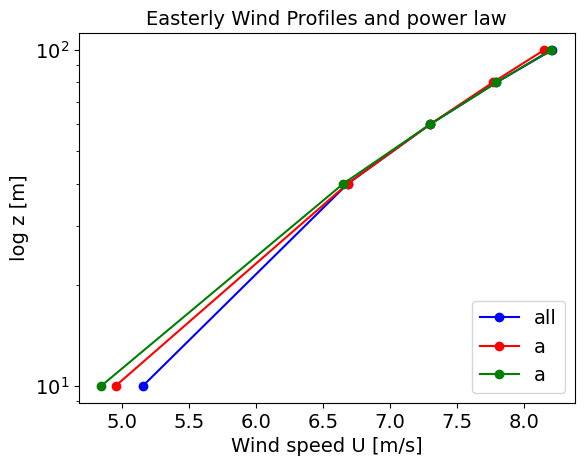

In [79]:
# QUESTION 7

Uall, Uall_std, ustar_meanu = get_U_all(data, Lreciprocal, V10, V40, V60, V80, V100, direction, ustar)
plt.plot(Uall, z, color='b',marker='o', label='all')

U40 = Uall[1]
U60 = Uall[2]
U80 = Uall[3]
z40 = z[1]
z60 = z[2]
z80 = z[3]

alpha_4060 = np.log(U40/U60) / np.log(z40/z60)
alpha_6080 = np.log(U60/U80) / np.log(z60/z80)

def power_law_profile(z, alpha, U_ref, z_ref):
    U_array = []
    for i in range(len(z)):
        U = U_ref*(z[i]/z_ref)**alpha 
        U_array.append(U)
    return U_array

U_a = power_law_profile(z,alpha_4060, U40, z40)
U_b = power_law_profile(z,alpha_6080, U80, z80)

plt.plot(U_a, z, color='r',marker='o', label='a')
plt.plot(U_b, z, color='g',marker='o', label='a')

plot_format_quetion7()


